# Your name: Peter Gurka
## Assignment Name: CA03 - Decison Tree Algorithm

# Program Inititialization Section
## Enter your import packages here

In [244]:
# import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

from sklearn.metrics import roc_curve, f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Data File Reading Section
## Write code to read in data from external sources here

In [245]:
#read the dataset
all_census = pd.read_csv('/Users/peter.gurka/Google Drive/My Drive/MSBA Colab 2020/ML Algorithms/CA03/census_data.csv')

# Data Quality Analysis

Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. / Display descriptive statistics of each column

In [246]:
all_census.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [247]:
all_census.shape

(48842, 11)

In [248]:
all_census.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [249]:
all_census.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [250]:
all_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [251]:
all_census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [252]:
all_census.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


## Cleansing the dataset

Perform necessary data cleansing and transformation based on your
observations from the data quality analysis

#### Dropping columns that aren't required
All columns are required it seems at this time
#### Dropping rows where no data is available
There are no missing values according to my data quality analysis

In [253]:
# Displaying  final columns
all_census.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

# Exploratory Data Analysis

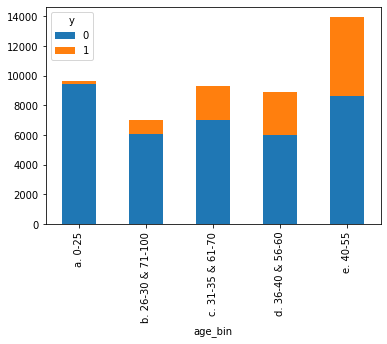

In [254]:
#Age Graph
all_census.pivot_table(index= 'age_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

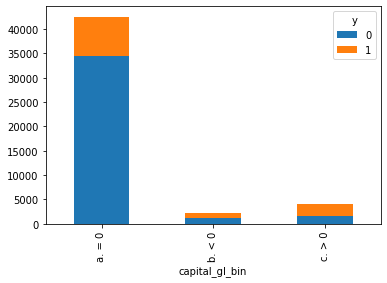

In [255]:
#Capital Gain/Loss Graph
all_census.pivot_table(index= 'capital_gl_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

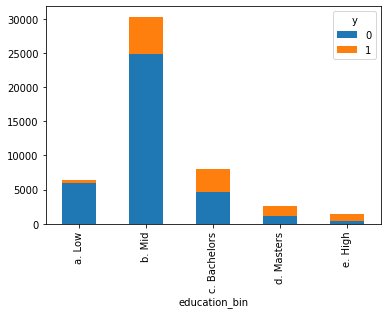

In [256]:
#Education Graph
all_census.pivot_table(index= 'education_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

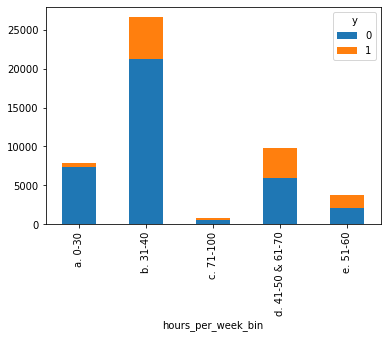

In [257]:
#Hours Per Week Graph
all_census.pivot_table(index= 'hours_per_week_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

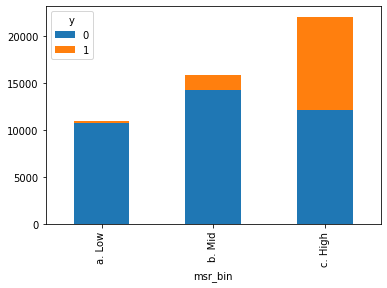

In [258]:
#Marriage Status and Relationship Graph
all_census.pivot_table(index= 'msr_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

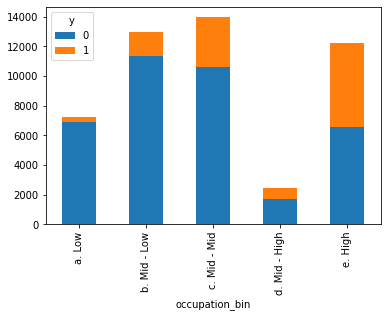

In [259]:
#Occupation Graph
all_census.pivot_table(index= 'occupation_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

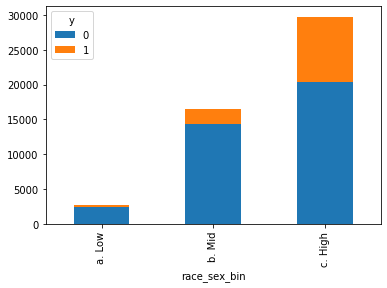

In [260]:
#Race and Sex Graph
all_census.pivot_table(index= 'race_sex_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

# Build Decision Tree Classifier Models

In [261]:
# export feature coulumns as categorical variables
for x in ['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin'
         ]:
    all_census[x] = all_census[x].astype('category')

In [262]:
#apply label encoder 
all_census[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']]=all_census[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']].apply(LabelEncoder().fit_transform)

In [263]:
all_census

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [264]:
#split all_census into test and train
test=all_census.loc[all_census.flag == 'test']

In [265]:
train=all_census.loc[all_census.flag == 'train']

In [266]:
# drop the flag column since it is no longer needed
test.drop(columns = 'flag', inplace = True)
train.drop(columns = 'flag', inplace = True)

/Users/peter.gurka/.local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [267]:
#split both datasets into attributes and labels
y_train = train['y']
x_train = train.drop('y',axis=1)
y_test = test['y']
x_test = test.drop('y',axis=1)

In [273]:
# syntax from professor
dtree = DecisionTreeClassifier(min_samples_split=18,
                               min_samples_leaf=20,
                               max_depth=48, 
                               random_state=101,
                               max_features = None,
                               criterion='gini')

dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

CPU times: user 55.9 ms, sys: 5.74 ms, total: 61.6 ms
Wall time: 63.4 ms


# Visualize Decision Tree Using Graph Viz

In [269]:
# from medium link explanatin 
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

# the issue seemed to be with Jupyter notebook. This (hopefully) should work fine if ran in Google Colab

InvocationException: GraphViz's executables not found

# Evaluate Decision Tree Performance

[[11506   929]
 [ 1635  2211]]


Text(0.5, 1, 'Confusion Matrix')

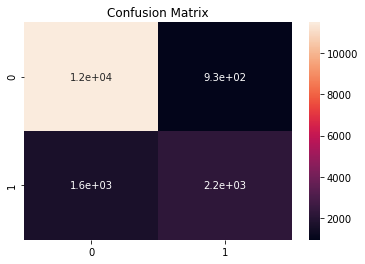

In [274]:
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

ax = pyplt.subplot()
sns.heatmap(con_matrix, annot=True, ax = ax)

ax.set_title('Confusion Matrix', loc='center')

In [275]:
# accuracy
print(accuracy_score(y_test, y_pred))

0.8425158159818193


In [276]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [277]:
# auc value
print(roc_auc_score(y_test, y_pred))

0.7500872556012013


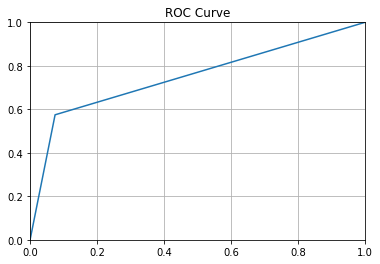

In [278]:
# roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.grid(True)


# Automation of Performance Tuning

In [290]:
hyper_var_values = pd.read_csv('/Users/peter.gurka/Google Drive/My Drive/MSBA Colab 2020/ML Algorithms/CA03/hyperparamater_variation.csv')

hyper_var_values

,Split Criteria (Entropy or Gini),Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,accuracy,recall,precision,f1
0,entropy,5,9,8,NaN,NaN,NaN,NaN
1,entropy,6,2,4,NaN,NaN,NaN,NaN
2,entropy,10,12,18,NaN,NaN,NaN,NaN
3,entropy,18,20,48,NaN,NaN,NaN,NaN
4,gini,5,9,8,NaN,NaN,NaN,NaN
5,gini,6,2,4,NaN,NaN,NaN,NaN
6,gini,10,12,18,NaN,NaN,NaN,NaN
7,gini,18,20,48,NaN,NaN,NaN,NaN


In [330]:
for x in range(0,8):

    dtree1 = DecisionTreeClassifier(min_samples_split=hyper_var_values.iloc[x,1],
                                   min_samples_leaf=hyper_var_values.iloc[x,2],
                                   max_depth=hyper_var_values.iloc[x,3], 
                                   random_state=101,
                                   max_features = None,
                                   criterion=hyper_var_values.iloc[x,0])

    dtree1.fit(x_train, y_train)
    y_pred=dtree1.predict(x_test)

    
    accuracy_list=[]

    recall_list=[]

    precision_list=[]

    f1_list=[]
    
    
    accuracy_list.append(accuracy_score(y_test, y_pred))

    recall_list.append(recall_score(y_test, y_pred))

    precision_list.append(precision_score(y_test, y_pred))

    f1_list.append(f1_score(y_test, y_pred))

    
    
    hyper_var_values.iloc[x,4]=accuracy_list[0]
    hyper_var_values.iloc[x,5]=recall_list[0]
    hyper_var_values.iloc[x,6]=precision_list[0]
    hyper_var_values.iloc[x,7]=f1_list[0]

In [331]:
hyper_var_values

,Split Criteria (Entropy or Gini),Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,accuracy,recall,precision,f1
0,entropy,5,9,8,0.846447,0.574623,0.718933,0.638728
1,entropy,6,2,4,0.834961,0.511180,0.708979,0.594047
2,entropy,10,12,18,0.840120,0.564223,0.700678,0.625090
3,entropy,18,20,48,0.841656,0.569683,0.703597,0.629598
4,gini,5,9,8,0.846938,0.581383,0.717126,0.642160
5,gini,6,2,4,0.834961,0.511180,0.708979,0.594047
6,gini,10,12,18,0.841165,0.562923,0.705212,0.626084
7,gini,18,20,48,0.842516,0.574883,0.704140,0.632980


# Prediction Using "Trained" Decision Tree Model

In [332]:
new_individual = [['d. 41-50 & 61-70', 'Mid-Low','x. High', 'x. >0', 'b. Mid', 'b. 9-12', 'e. High', 'b. income', 'd.36-40 & 56-60']]

In [334]:
person = pd.DataFrame(data = new_individual, 
                      columns = ['hours_per_week_bin',
                                  'occupation_bin',
                                  'msr_bin',
                                  'capital_gl_bin',
                                  'race_sex_bin',
                                  'education_num_bin',
                                  'education_bin',
                                  'workclass_bin',
                                  'age_bin'],dtype='object')

In [335]:
for x in ['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']:
            person[x] = person[x].astype('category')

In [337]:
person[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']] = person [['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']].apply(LabelEncoder().fit_transform)

In [338]:
dtree.predict(person)

array([0])